<a href="https://colab.research.google.com/github/mdshakilahmed72/Attendance_System/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report,confusion_matrix


In [3]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

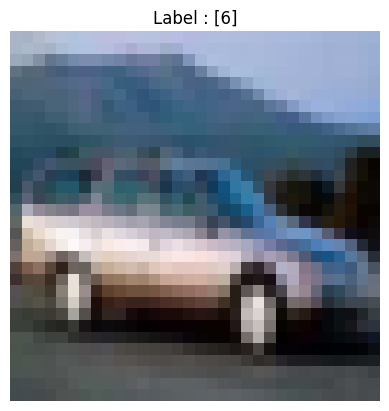

In [6]:
plt.imshow(x_train[4])
plt.title(f"Label : {y_train[0]}")
plt.axis("off")
plt.show()

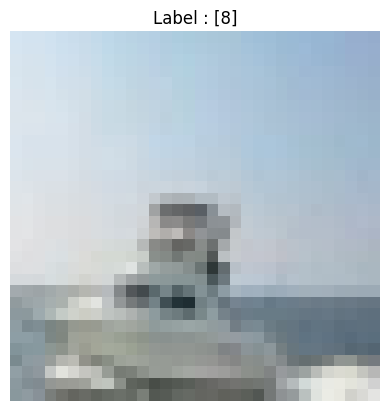

In [7]:
plt.imshow(x_train[100])
plt.title(f"Label : {y_train[100]}")
plt.axis("off")
plt.show()

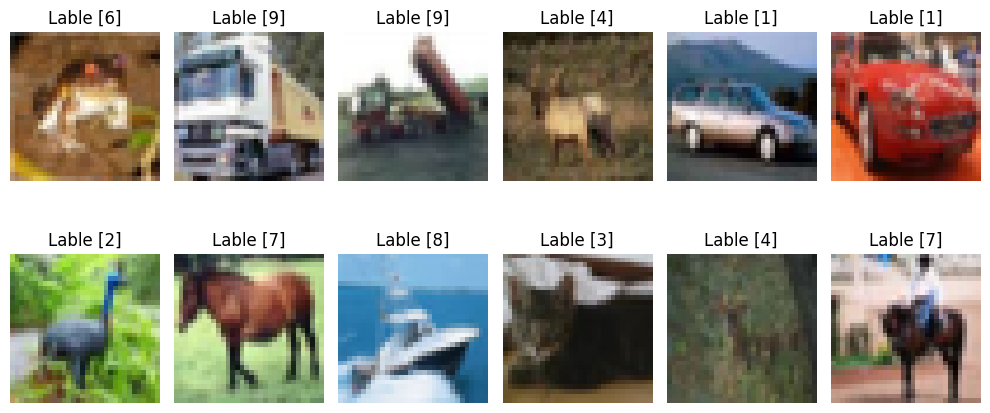

In [8]:
plt.figure(figsize=(10,5))

for i in range(12):
  plt.subplot(2,6,i+1)
  plt.imshow(x_train[i])
  plt.title(f"Lable {y_train[i]}")
  plt.axis("off")

plt.tight_layout()
plt.show()

In [9]:
x_train,x_test= x_train/255.0, x_test/255.0

In [10]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [11]:
y_train,y_test= y_train.flatten(),y_test.flatten()


In [12]:
cnn_model = models.Sequential()

In [13]:
cnn_model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(32,32,3)))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPooling2D(2,2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
cnn_model.add(layers.Conv2D(64,(3,3),activation="relu"))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPooling2D(2,2))

In [15]:
cnn_model.add(layers.Conv2D(128,(3,3),activation="relu"))
cnn_model.add(layers.BatchNormalization())

In [16]:
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(128,activation="relu"))
cnn_model.add(layers.Dropout(0.5))
cnn_model.add(layers.Dense(10,activation="softmax"))

In [17]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 357,706 (1.36 MB)

 Trainable params: 357,258 (1.36 MB)

 Non-trainable params: 448 (1.75 KB)

In [18]:
cnn_model.compile(
    optimizer='adam',loss= 'sparse_categorical_crossentropy',
    metrics=["accuracy"]
)

In [19]:
history = cnn_model.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2, verbose=2)

Epoch 1/10
625/625 - 84s - 135ms/step - accuracy: 0.4451 - loss: 1.6581 - val_accuracy: 0.5259 - val_loss: 1.3197
Epoch 2/10
625/625 - 88s - 141ms/step - accuracy: 0.6003 - loss: 1.1471 - val_accuracy: 0.4581 - val_loss: 1.8610
Epoch 3/10
625/625 - 139s - 222ms/step - accuracy: 0.6581 - loss: 0.9823 - val_accuracy: 0.5459 - val_loss: 1.3334
Epoch 4/10
625/625 - 83s - 132ms/step - accuracy: 0.6938 - loss: 0.8749 - val_accuracy: 0.6582 - val_loss: 0.9967
Epoch 5/10
625/625 - 144s - 231ms/step - accuracy: 0.7226 - loss: 0.7879 - val_accuracy: 0.6627 - val_loss: 0.9825
Epoch 6/10
625/625 - 138s - 220ms/step - accuracy: 0.7495 - loss: 0.7108 - val_accuracy: 0.6862 - val_loss: 0.9793
Epoch 7/10
625/625 - 83s - 133ms/step - accuracy: 0.7695 - loss: 0.6554 - val_accuracy: 0.6989 - val_loss: 0.9103
Epoch 8/10
625/625 - 90s - 144ms/step - accuracy: 0.7909 - loss: 0.5968 - val_accuracy: 0.6969 - val_loss: 0.9505
Epoch 9/10
625/625 - 132s - 211ms/step - accuracy: 0.8066 - loss: 0.5485 - val_accura

In [20]:
test_loss, test_accuracy =cnn_model.evaluate(x_test,y_test,verbose=2)
print(f"Test Accuracy : {test_accuracy:.2f}")

313/313 - 11s - 34ms/step - accuracy: 0.7088 - loss: 0.9811
Test Accuracy : 0.71


In [21]:
class_name = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


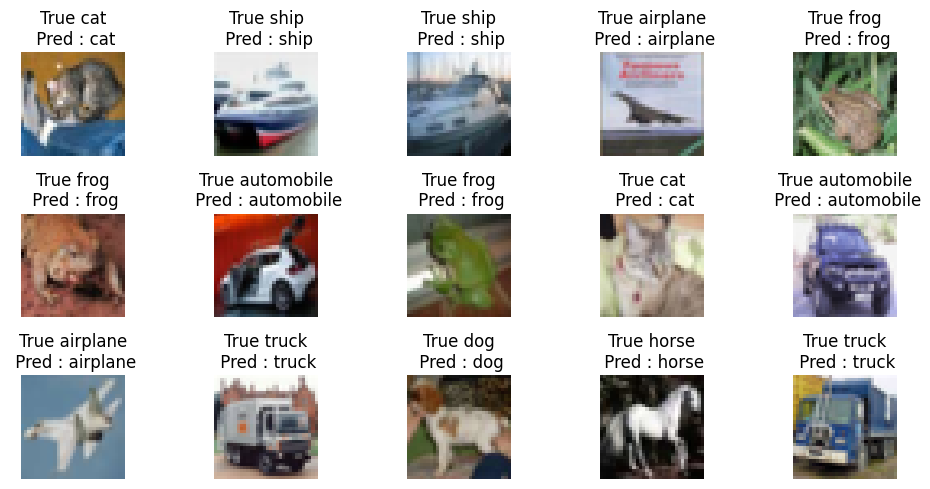

In [22]:
sample_images= x_test[:15]
sample_labels= y_test[:15]
predictions = np.argmax(cnn_model.predict(sample_images),axis=1)

plt.figure(figsize=(10,5))

for i in range(15):
  plt.subplot(3,5,i+1)
  plt.imshow(sample_images[i])
  plt.title(f"True {class_name[sample_labels[i]]}\n Pred : {class_name[predictions[i]]}")
  plt.axis("off")

plt.tight_layout()
plt.show()


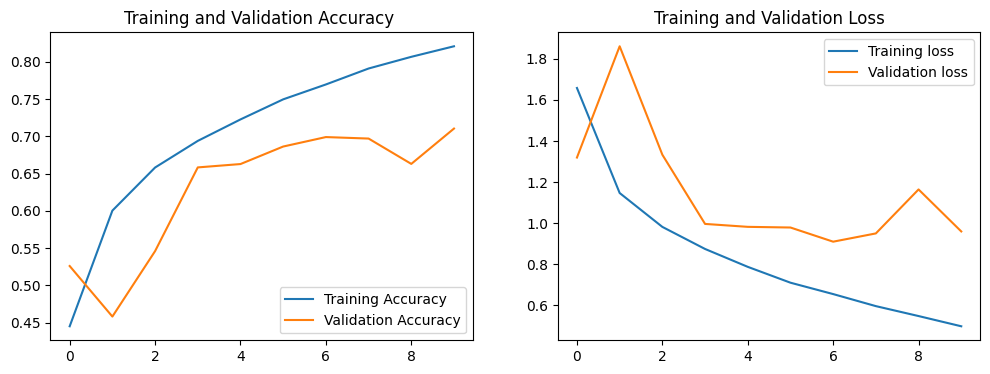

In [27]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label ="Training Accuracy")
plt.plot(history.history['val_accuracy'],label ="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy ")


plt.subplot(1,2,2)
plt.plot(history.history['loss'],label ="Training loss")
plt.plot(history.history['val_loss'],label ="Validation loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step


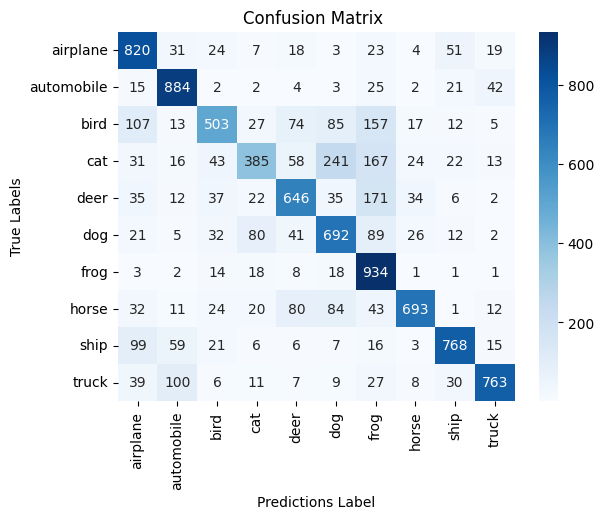

In [30]:
y_predict = np.argmax(cnn_model.predict(x_test),axis=1)
con_mat = confusion_matrix(y_test,y_predict)
sns.heatmap(con_mat,annot=True,fmt="d",cmap="Blues",xticklabels=class_name,yticklabels=class_name)
plt.xlabel("Predictions Label")
plt.ylabel("True Labels")
plt.title("Confusion Matrix ")
plt.show()

In [31]:
report = classification_report(y_test,y_predict,target_names=class_name)
print(report)

              precision    recall  f1-score   support

    airplane       0.68      0.82      0.74      1000
  automobile       0.78      0.88      0.83      1000
        bird       0.71      0.50      0.59      1000
         cat       0.67      0.39      0.49      1000
        deer       0.69      0.65      0.67      1000
         dog       0.59      0.69      0.64      1000
        frog       0.57      0.93      0.70      1000
       horse       0.85      0.69      0.76      1000
        ship       0.83      0.77      0.80      1000
       truck       0.87      0.76      0.81      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.70     10000
weighted avg       0.72      0.71      0.70     10000

